<a href="https://colab.research.google.com/github/asutoshpaluri20-droid/Asutosh_INFO5731_Fall2025/blob/main/Paluri_Asutosh_Assignment_03ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [9]:
import pandas as pd
import re
from collections import defaultdict

# --- Load dataset ---
df = pd.read_csv("imdb_reviews-2.csv")
reviews = df["text"].dropna().astype(str).tolist()   # ✅ use the correct column

print(f"Loaded {len(reviews)} reviews.")
print("Example review:", reviews[0][:150], "...\n")

# --- Tokenization ---
def tokenize(text):
    text = text.lower()
    tokens = re.findall(r'\b\w+\b', text)
    return tokens

def get_ngrams(tokens, n):
    return [' '.join(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

Loaded 1000 reviews.
Example review: I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard th ...



In [10]:
# Q1) Count the frequency of all the N-grams (N=3) and (N=2).
bigram_freq = defaultdict(int)
trigram_freq = defaultdict(int)
unigram_freq = defaultdict(int)

for review in reviews:
    tokens = tokenize(review)
    for word in tokens:
        unigram_freq[word] += 1
    for bigram in get_ngrams(tokens, 2):
        bigram_freq[bigram] += 1
    for trigram in get_ngrams(tokens, 3):
        trigram_freq[trigram] += 1

print("\n=== Bigram Frequencies (Top 10) ===")
for bigram, count in list(sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True))[:10]:
    print(f"{bigram}: {count}")

print("\n=== Trigram Frequencies (Top 10) ===")
for trigram, count in list(sorted(trigram_freq.items(), key=lambda x: x[1], reverse=True))[:10]:
    print(f"{trigram}: {count}")


=== Bigram Frequencies (Top 10) ===
br br: 2282
of the: 1384
in the: 1040
it s: 707
this movie: 687
to be: 560
the film: 532
and the: 525
the movie: 493
this film: 476

=== Trigram Frequencies (Top 10) ===
br br the: 332
br br i: 191
one of the: 152
i don t: 127
this movie is: 119
of the film: 105
of the movie: 89
it s a: 88
to be a: 87
a lot of: 79


In [11]:
# Q2)  Calculate the probabilities for all the bigrams in the dataset by using the formula count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.\

bigram_probs = {}
for bigram, count in bigram_freq.items():
  word1, word2 = bigram.split()
  bigram_probs[bigram] = count / unigram_freq[word1]

print("Bigram Probabnilities")
for bigram, prob in list(sorted(bigram_probs.items(), key = lambda x: x[1], reverse=True))[:10]:
  print(f"P({bigram.split()[1]}|{bigram.split()[0]}) = {prob:.3f}")



Bigram Probabnilities
P(that|controversy) = 1.000
P(i|1967) = 1.000
P(by|seized) = 1.000
P(to|attentions) = 1.000
P(thought|swede) = 1.000
P(of|denizens) = 1.000
P(mind|countrymen) = 1.000
P(bergman|ingmar) = 1.000
P(the|commend) = 1.000
P(t|doesn) = 1.000


In [12]:
# Q3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

def extract_noun_phrases(text):
    tokens = tokenize(text)
    phrases = []
    for i in range(len(tokens)-1):
        # Simple heuristic for adjectives + noun
        if tokens[i].endswith(('y', 'ive', 'ous')) or tokens[i] in ['good', 'great', 'amazing', 'nice', 'fantastic', 'bad']:
            phrases.append(tokens[i] + " " + tokens[i+1])
    return phrases

noun_phrase_counts = []
total_np_freq = defaultdict(int)

for review in reviews:
    phrases = extract_noun_phrases(review)
    counts = defaultdict(int)
    for p in phrases:
        counts[p] += 1
        total_np_freq[p] += 1
    noun_phrase_counts.append(counts)

max_np_freq = max(total_np_freq.values()) if total_np_freq else 1
noun_phrases = list(total_np_freq.keys())

print("\n=== Relative Probabilities Table (Top 5 Noun Phrases) ===")
print("Review_ID".ljust(10), end="")
for np in noun_phrases[:5]:
    print(np.ljust(20), end="")
print()

for i, counts in enumerate(noun_phrase_counts[:5]):  # show first 5 reviews
    print(f"R{i+1}".ljust(10), end="")
    for np in noun_phrases[:5]:
        rel_prob = counts[np] / max_np_freq if np in counts else 0
        print(f"{rel_prob:<20.2f}", end="")
    print()


=== Relative Probabilities Table (Top 5 Noun Phrases) ===
Review_ID curious yellow      my video            controversy that    by u                country therefore   
R1        0.01                0.00                0.00                0.00                0.00                
R2        0.00                0.00                0.00                0.00                0.00                
R3        0.00                0.00                0.00                0.00                0.00                
R4        0.00                0.00                0.00                0.00                0.00                
R5        0.00                0.00                0.00                0.00                0.00                


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [13]:
#Q1)

import pandas as pd
import numpy as np
import math
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Step 1: Load and preprocess dataset

data = pd.read_csv("imdb_reviews-2.csv")

# Clean and tokenize text
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = str(text).lower()
    tokens = [w for w in word_tokenize(text) if w.isalpha() and w not in stop_words]
    return tokens

data['tokens'] = data['text'].apply(preprocess)

# Step 2: Build vocabulary

vocab = sorted(list(set([word for tokens in data['tokens'] for word in tokens])))
print(f"Vocabulary Size: {len(vocab)}")

# Step 3: Compute Term Frequency (TF)

def compute_tf(tokens):
    tf = {}
    total_terms = len(tokens)
    for term in tokens:
        tf[term] = tf.get(term, 0) + 1
    for term in tf:
        tf[term] = tf[term] / total_terms
    return tf

data['tf'] = data['tokens'].apply(compute_tf)

# Step 4: Compute Inverse Document Frequency (IDF)

def compute_idf(vocab, documents):
    N = len(documents)
    idf = {}
    for term in vocab:
        df = sum(1 for doc in documents if term in doc)
        idf[term] = math.log((N / (1 + df)))  # add 1 to avoid division by zero
    return idf

idf = compute_idf(vocab, data['tokens'])

# Step 5: Compute TF-IDF for each document

def compute_tfidf(tf_dict, idf_dict):
    tfidf = {}
    for term, tf_val in tf_dict.items():
        tfidf[term] = tf_val * idf_dict.get(term, 0)
    return tfidf

data['tfidf'] = data['tf'].apply(lambda x: compute_tfidf(x, idf))

# Step 6: Convert to Document-Term Matrix

tfidf_matrix = pd.DataFrame(0.0, index=range(len(data)), columns=vocab)

for i, tfidf_dict in enumerate(data['tfidf']):
    for term, val in tfidf_dict.items():
        tfidf_matrix.at[i, term] = val

print("✅ TF-IDF matrix successfully built!")
print(tfidf_matrix.head())

Loaded 1000 documents.
Example document: I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first rel ...

Vocabulary size: 15890 words

=== Top 5 Relevant Documents ===
1. Doc 50 - Cosine Similarity: 0.1065
I saw this film opening weekend in Australia, anticipating with an excellent cast of Ledger, Edgerton, Bloom, Watts and Rush that the definitive story of Ned Kelly would unfold before me. Unfortunatel 

2. Doc 983 - Cosine Similarity: 0.1059
I don't understand people. Why is it that this movie is getting an 8.3!!!!!!???? I had high hopes for this movie, but once i was about a half hour into it I just wanted to leave the theater. In the va 

3. Doc 492 - Cosine Similarity: 0.1051
Another violent, angry fantasy from Paul Verhoeven. Verhoeven is a puzzle: it's difficult to tell whether he takes his sordid impulses seriously, with sardonic intent or operates in complete oblivion. 

4. Doc 516 - Cosine Similarity: 0.0979
Luise 

In [20]:
# Q2)

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv("imdb_reviews-2.csv")

# Display first few rows
print("Dataset Loaded Successfully!")
print(df.head())

# Assuming the review text column is named 'review' or similar
if 'review' in df.columns:
    text_col = 'review'
elif 'text' in df.columns:
    text_col = 'text'
else:
    # If unsure, print columns
    print("Columns found:", df.columns)
    raise ValueError("Couldn't find the text column. Please update text_col variable.")


vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
tfidf_matrix = vectorizer.fit_transform(df[text_col])


query = "An outstanding movie with a haunting performance and best character development"

query_vector = vectorizer.transform([query])


cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()


df['similarity_score'] = cosine_similarities
ranked_df = df.sort_values(by='similarity_score', ascending=False)

print("\nTop 10 Reviews Most Similar to the Query:\n")
for i, row in ranked_df.head(10).iterrows():
    print(f"Rank: {i+1} | Similarity: {row['similarity_score']:.4f}")
    print(f"Review: {row[text_col]}")
    print("-" * 80)


Dataset Loaded Successfully!
                                                text
0  I rented I AM CURIOUS-YELLOW from my video sto...
1  "I Am Curious: Yellow" is a risible and preten...
2  If only to avoid making this type of film in t...
3  This film was probably inspired by Godard's Ma...
4  Oh, brother...after hearing about this ridicul...

Top 10 Reviews Most Similar to the Query:

Rank: 984 | Similarity: 0.1636
Review: I don't understand people. Why is it that this movie is getting an 8.3!!!!!!???? I had high hopes for this movie, but once i was about a half hour into it I just wanted to leave the theater. In the vast majority of the reviews on this site people are saying that this is one of the best action movies they've seen (or of the summer, year, etc.) They say it's an excellent conclusion. WTF!!!!!!!!!?????? What has been concluded (besides the fact that Bourne can ride motorcycles, shoot, and fight better than anyone else he comes across)? What do you learn about Bourne's

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the embeddings using PCA or t-SNE in 2D. Create a scatter plot of at least 20 words and show how similar words cluster together.

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [14]:
# Q1)

import pandas as pd
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("imdb_reviews-2.csv")

# Tokenize the text
nltk.download('punkt')
nltk.download('punkt_tab') # Download the missing resource
sentences = [word_tokenize(str(text).lower()) for text in data['text']]

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=5, min_count=3, workers=4, sg=1)
model.save("word2vec_300.model")

print(" Word2Vec model trained successfully with 300 dimensions.")

# Check similar words
print(model.wv.most_similar("movie", topn=10))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


 Word2Vec model trained successfully with 300 dimensions.
[('film', 0.923336386680603), ('dvd', 0.8291728496551514), ('crap', 0.8226432800292969), ('flick', 0.8208380341529846), ('sequel', 0.8187171816825867), ('low', 0.8075346350669861), ('garbage', 0.8045918345451355), ('piece', 0.8012686371803284), ('everything', 0.7992282509803772), ('genre', 0.7974357604980469)]


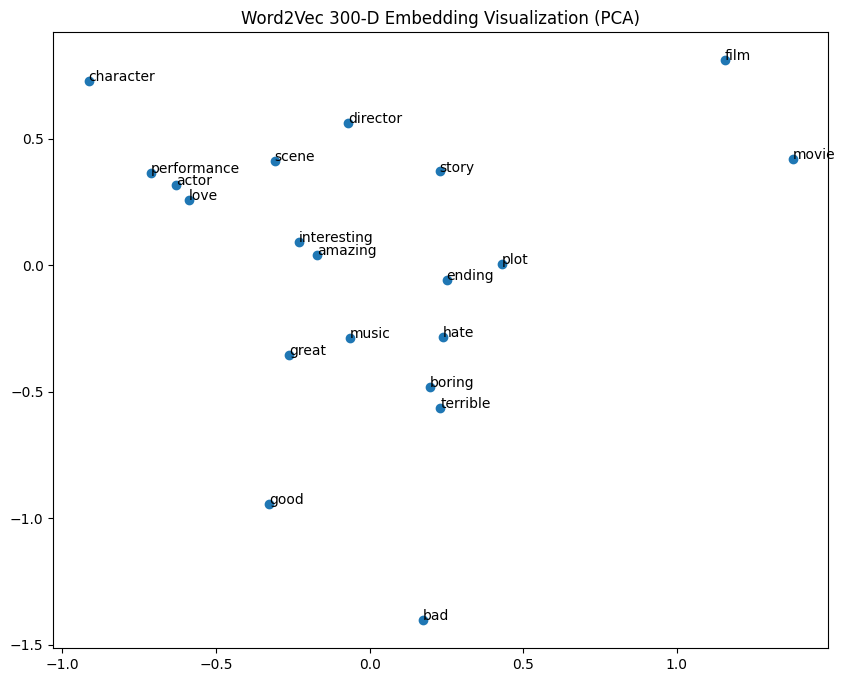

In [15]:
# Q2)

# Choose 20 words to visualize
words = ["movie", "film", "story", "character", "actor", "performance",
         "bad", "good", "great", "terrible", "amazing", "love", "hate",
         "boring", "interesting", "director", "plot", "music", "scene", "ending"]

# Get embeddings
vectors = [model.wv[w] for w in words if w in model.wv]

# Reduce dimensions
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(10,8))
plt.scatter(result[:,0], result[:,1])
for i, word in enumerate(words):
    if word in model.wv:
        plt.annotate(word, xy=(result[i,0], result[i,1]))
plt.title("Word2Vec 300-D Embedding Visualization (PCA)")
plt.show()


In [16]:
#Q3)

from numpy import dot
from numpy.linalg import norm

def cosine_similarity(vec1, vec2):
    return dot(vec1, vec2) / (norm(vec1) * norm(vec2))

pairs = [("good", "great"), ("good", "bad"), ("movie", "film"), ("boring", "interesting")]

for w1, w2 in pairs:
    if w1 in model.wv and w2 in model.wv:
        sim = cosine_similarity(model.wv[w1], model.wv[w2])
        print(f"Cosine similarity between '{w1}' and '{w2}': {sim:.3f}")


Cosine similarity between 'good' and 'great': 0.841
Cosine similarity between 'good' and 'bad': 0.789
Cosine similarity between 'movie' and 'film': 0.923
Cosine similarity between 'boring' and 'interesting': 0.767


## Question 4 (20 Points)

**Create your own training and evaluation dataset for an NLP task.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


GitHub FIle Link
https://github.com/asutoshpaluri20-droid/Asutosh_INFO5731_Fall2025.git



1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [21]:
"""
I think the material was very clear, firstly starting with simple examples and then delving into more complex examples. By doing
these exercises I feel more confident in my skills of Python Programming and can apply these concepts. other than that i feel like of we do
live python programming in class as we conver topic and applying these live would help student get the concepts more easily.
"""

'\nI think the material was very clear, firstly starting with simple examples and then delving into more complex examples. By doing\nthese exercises I feel more confident in my skills of Python Programming and can apply these concepts. other than that i feel like of we do\nlive python programming in class as we conver topic and applying these live would help student get the concepts more easily. \n'